# Employee Segmentation for Performance Improvement and Retention

Using K-means clustering solve the following problems:

1)Segmenting the people who needs improvement from their dedication and performance perspective.

2)Identify the people who needs HR attention for retaining them within the organisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('data_cleaned.csv')
df.shape
df.head()

,Eployee No,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,dep,salary
0,1,0.38,0.53,2,157,3,1,1
1,2,0.80,0.86,5,262,6,1,2
2,3,0.11,0.88,7,272,4,1,2
3,4,0.72,0.87,5,223,5,1,1
4,5,0.37,0.52,2,159,3,1,1


In [4]:
df.drop('Eployee No',axis=1, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,dep,salary
0,0.38,0.53,2,157,3,1,1
1,0.80,0.86,5,262,6,1,2
2,0.11,0.88,7,272,4,1,2
3,0.72,0.87,5,223,5,1,1
4,0.37,0.52,2,159,3,1,1


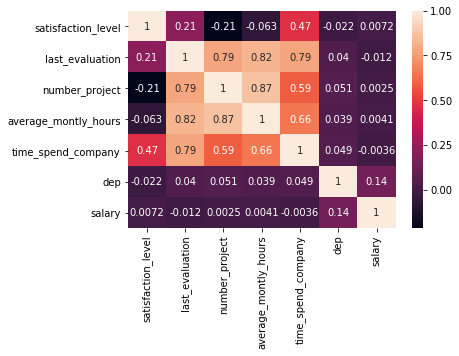

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
SSE={}

for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000)
    kmeans.fit(df)
    df['Clusters']=kmeans.labels_
    SSE[k]=kmeans.inertia_

SSE


{1: 4154586.654818306,
 2: 471636.81646677526,
 3: 213811.8074534972,
 4: 141104.69639807538,
 5: 95337.51802710383,
 6: 70466.57938477724,
 7: 58345.31944927477,
 8: 51898.67083767582,
 9: 43580.074033330115}

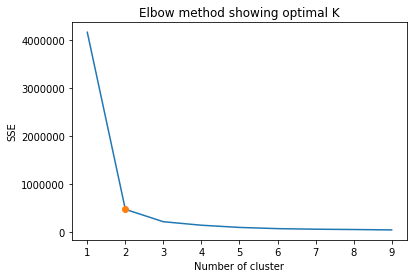

In [7]:
# To find optimum number of clusters: Using Elbow method


plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('Elbow method showing optimal K')
plt.plot(2, SSE[2], 'o')
plt.show()

Text(0.5, 0, 'average_montly_hours')

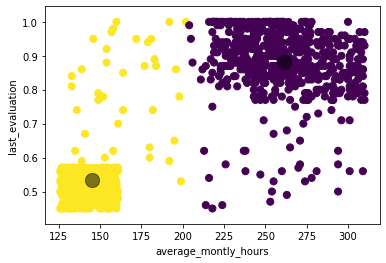

In [8]:
# Clustering: satisfaction_level and last_evaluation

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
y_kmeans=kmeans.predict(df)

plt.scatter(df['average_montly_hours'],df['last_evaluation'], 
            c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 1], c='black', s=200, alpha=0.5)
plt.ylabel("last_evaluation")
plt.xlabel("average_montly_hours")

#### Observations :
People putting high efforts are getting better evaluation.\
People in the bottom – left section are typically non performant and low on dedication\
#### Action :
Plan soft skill / technical programs\
Segregate the people who needs to be replaced, initiate recruitment plan\
Change the assignments to suit their area of interest and strengths


Text(0, 0.5, 'average_montly_hours')

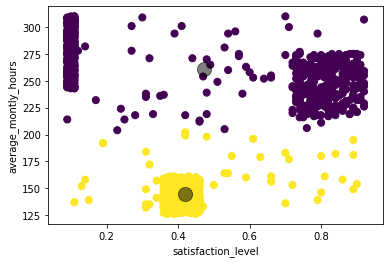

In [9]:
# Clustering: satisfaction_level and average_montly_hours
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df['satisfaction_level'],df['average_montly_hours'], c=y_kmeans,
            s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5)
plt.xlabel("satisfaction_level")
plt.ylabel("average_montly_hours")

#### Observations :
People working more than 275 hours are not typically highly satisfied.\
Set of people have very low satisfaction level though they are putting very high efforts.\
Set of average performers\
#### Action :
Put a check that people are not working more than stipulated hours unless otherwise approved.\
Re-plan the work for people having low satisfaction level.\
Investigate to understand the root cause for average performers.\
Relook into the department functioning to identify that why abc department has typically put in low efforts.Critically analyse why their satisfaction level is below average.  
